In [162]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import special
from scipy import optimize
from scipy import sparse
from scipy.sparse.linalg import spsolve
import copy

In [216]:
#a.)
uEnd = 0.25
def u(t, y, n):
    sumu = 0
    for i in range(n):
        sumu += special.erfc((2*i+1-y)/(2*np.sqrt(t))) - special.erfc((2*i+1+y)/(2*np.sqrt(t)))
    return sumu -uEnd
tEnd = optimize.fsolve(u, 0.2, args = (0.5, 10))
print(tEnd)
#This was a difficult function to find the root of without knowing where to start the iteration.
#The function converged only when the initial guess was within the interval [0.02, 0.2].

[0.09468696]


u( 0.5, 0.0946869595678489 ) = 0.250152092270551


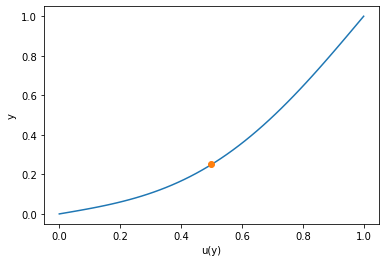

In [234]:
#b.)
def FTCS(tEnd, jmax, r):
    dy=1/(jmax-1)
    u = np.zeros(jmax)
    u[-1] = 1
    y = np.linspace(0,1,jmax)
    dt = r*dy**2
    nmax = int(np.ceil(tEnd/dt))
    for n in range(nmax):
        nu = copy.copy(u*(1-2*r))
        nu[1:] += copy.copy(r*u[:-1])
        nu[:-1] += copy.copy(r*u[1:])
        nu[0]=0
        nu[-1]=1
        u = copy.copy(nu)
    return y, u

y1, u1 = FTCS(tEnd[0], 101, 0.5)
   
plt.xlabel('u(y)')
plt.ylabel('y')
plt.plot(y1,u1)
plt.plot(0.5, 0.25, "o")
print("u( 0.5,", tEnd[0], ") =", u1[int(len(y1)/2)])

#Not that inaccurate

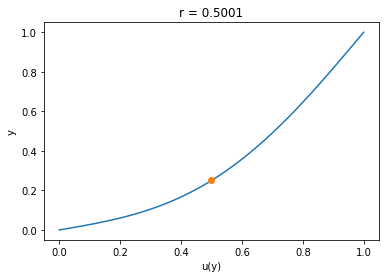

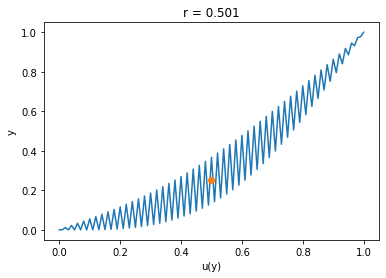

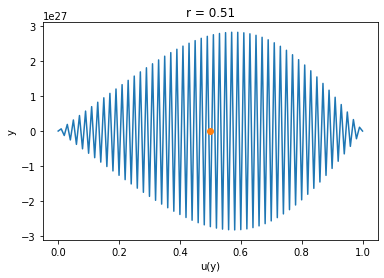

In [91]:
#c.)
y2, u2 = FTCS(tEnd[0], 101, 0.5001)
y3, u3 = FTCS(tEnd[0], 101, 0.501)
y4, u4 = FTCS(tEnd[0], 101, 0.51)

plt.figure(1)
plt.title("r = 0.5001")
plt.xlabel('u(y)')
plt.ylabel('y')
plt.plot(y2,u2)
plt.plot(0.5, 0.25, "o")

plt.figure(2)
plt.title("r = 0.501")
plt.xlabel('u(y)')
plt.ylabel('y')
plt.plot(y3,u3)
plt.plot(0.5, 0.25, "o")

plt.figure(3)
plt.title("r = 0.51")
plt.xlabel('u(y)')
plt.ylabel('y')
plt.plot(y4,u4)
plt.plot(0.5, 0.25, "o")

In [ ]:
#For r = 0.5001 the scheme has not blown up yet, for r = 0.501 it is really struggling and for r = 0.51 it is game over.

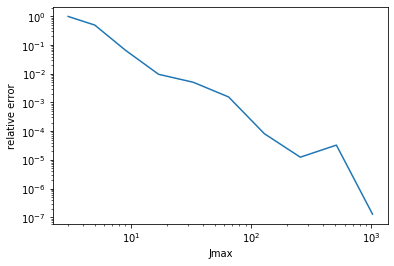

In [134]:
#d.)
N = 10
m = np.linspace(1,N,N)
jMax = 2**m+1
E = np.zeros(N)
for i in range(N):
    y, u = FTCS(tEnd[0], int(jMax[i]), 0.5)
    E[i] = u[int(jMax[i]/2)]
E -= 0.25
E = np.abs(E)/0.25

plt.xlabel('Jmax')
plt.ylabel('relative error')
plt.loglog(jMax, E)

In [ ]:
#The relative error is continously decreasing except for jmax = 2^9+1, there it is somehow increasing,
#but then drastically decreasing again down to jmax = 2^10+1

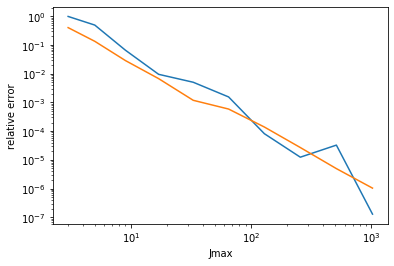

In [135]:
#e.)
N = 10
m = np.linspace(1,N,N)
jMax = 2**m+1
E1 = np.zeros(N)
for i in range(N):
    y, u = FTCS(tEnd[0], int(jMax[i]), 1/6)
    E1[i] = u[int(jMax[i]/2)]
E1 -= 0.25
E1 = np.abs(E1)/0.25

plt.xlabel('Jmax')
plt.ylabel('relative error')
plt.loglog(jMax, E)
plt.loglog(jMax, E1)

In [ ]:
#The errors are not differing that much, but the error for r = 1/6 is mor linear on the logarithmic plot while for
#r = 0.5 it varies more.

u( 0.5, 0.0946869595678489 ) = 0.24997698488738757


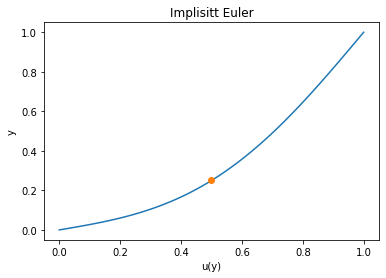

In [236]:
#g.)
def BTCS(tEnd, jmax, r):
    dy=1/(jmax-1)
    b = np.zeros(jmax-2)
    #u[-1] = 1
    y = np.linspace(0,1,jmax)
    dt = r*dy**2
    nmax = int(np.ceil(tEnd/dt))
    A = (1+2*r)*sparse.eye(jmax-2, jmax-2) - r*sparse.eye(jmax-2,jmax-2,-1) - r*sparse.eye(jmax-2,jmax-2,1)
    for n in range(nmax):
        b[-1]  += r*1
        u = spsolve(A, b)
        b = copy.copy(u)
    u = np.insert(u, 0, 0)
    u = np.append(u, 1)
    return y, u

y1, u1 = BTCS(tEnd, 101, 0.5)

plt.title("Implisitt Euler")
plt.xlabel('u(y)')
plt.ylabel('y')
plt.plot(y1, u1)
plt.plot(0.5, 0.25, "o")
print("u( 0.5,", tEnd[0], ") =", u1[int(len(y1)/2)])

In [ ]:
#5 times more accurate than FTCS

100000.0


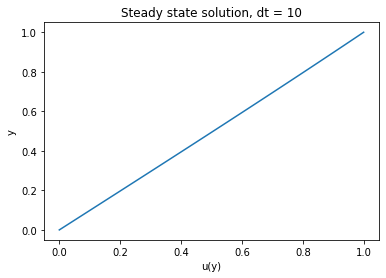

In [237]:
dt = 10
jmax = 101
dy = 1/(jmax-1)
r = dt/dy**2
print(r)

y2, u2 = BTCS(1, jmax, r)
plt.title("Steady state solution, dt = 10")
plt.xlabel('u(y)')
plt.ylabel('y')
plt.plot(y2, u2)

In [ ]:
#Even stable at r = 100000

[9.46869596e+10]
[0.09468696]


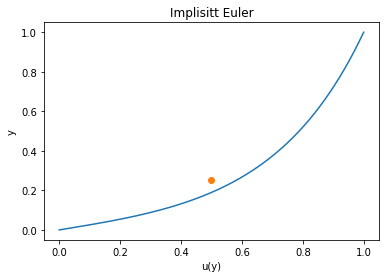

In [230]:
dt = tEnd
jmax = 1000001
dy = 1/(jmax-1)
R = dt/(dy**2)
print(R)
print(R*dy**2)

y3, u3 = BTCS(tEnd[0], jmax, R[0])

plt.title("dt = tEnd")
plt.xlabel('u(y)')
plt.ylabel('y')
plt.plot(y3, u3)
plt.plot(0.5, 0.25, "o")

In [ ]:
#Not able to get an accurate solution with dt = tEnd no matter how large jmax is